## Replace labels by joint probability of the target being 1 or 0

For each label, we calculate the mean of target=1, that is the probability of being 1 ( P(1) ), and also the probability of the target=0 ( P(0) ). And then, we calculate the ratio P(1)/P(0), and replace the labels by that ratio.

https://github.com/raytroop/FeatureEngineering/blob/master/Course-Notebooks/10.7_Probability_ratio_encoding.ipynb

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

/Users/moritayasushieda/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
data = pd.read_csv('../datasets/titanic/train.csv', usecols=['Cabin', 'Survived'])

In [5]:
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [7]:
data.Cabin.fillna('Missing', inplace=True)
data.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [8]:
len(data.Cabin.unique())

148

In [10]:
data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [11]:
data.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [12]:
data['Cabin'].value_counts().sort_values()

T      1
G      4
F     13
A     15
E     32
D     33
B     47
C     59
M    687
Name: Cabin, dtype: int64

## Important
The calculation of the probability ratios to replace the labels should be done considering ONLY on the training set, and then expanded it to the test set. See below.

In [19]:
# Let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[['Cabin', 'Survived']],
                                                    data[['Survived']], test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 2), (268, 2))

In [20]:
X_train.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.428571
B    0.774194
C    0.571429
D    0.692308
E    0.740741
F    0.666667
G    0.500000
M    0.303609
T    0.000000
Name: Survived, dtype: float64

In [25]:
prob_df = X_train.groupby(['Cabin'])['Survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.428571
B,0.774194
C,0.571429
D,0.692308
E,0.740741
F,0.666667
G,0.500000
M,0.303609
T,0.000000


In [27]:
prob_df['Died'] = 1-prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.428571,0.571429
B,0.774194,0.225806
C,0.571429,0.428571
D,0.692308,0.307692
E,0.740741,0.259259
F,0.666667,0.333333
G,0.500000,0.500000
M,0.303609,0.696391
T,0.000000,1.000000


In [29]:
prob_df['ratio'] = prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,ratio
Cabin,,,
A,0.428571,0.571429,0.750000
B,0.774194,0.225806,3.428571
C,0.571429,0.428571,1.333333
D,0.692308,0.307692,2.250000
E,0.740741,0.259259,2.857143


In [33]:
prob_df['ratio'].to_dict()

{'A': 0.75,
 'B': 3.428571428571428,
 'C': 1.3333333333333333,
 'D': 2.25,
 'E': 2.8571428571428563,
 'F': 1.9999999999999998,
 'G': 1.0,
 'M': 0.4359756097560975,
 'T': 0.0}

In [35]:
ordered_labels = prob_df['ratio'].to_dict()

In [36]:
X_train['Cabin_ordered'] = X_train['Cabin'].map(ordered_labels)

In [37]:
X_train.head()

,Cabin,Survived,Cabin_ordered
857,E,1,2.857143
52,D,1,2.250000
386,M,0,0.435976
124,D,0,2.250000
578,M,0,0.435976


In [38]:
X_test['Cabin_ordered'] = X_test['Cabin'].map(ordered_labels)

In [39]:
X_test.head()

,Cabin,Survived,Cabin_ordered
495,M,0,0.435976
648,M,0,0.435976
278,M,0,0.435976
31,B,1,3.428571
255,M,1,0.435976


3 plot the original variable 

Text(0, 0.5, 'Survived')

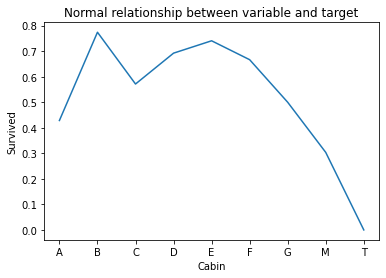

In [40]:
# plot the original variable

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

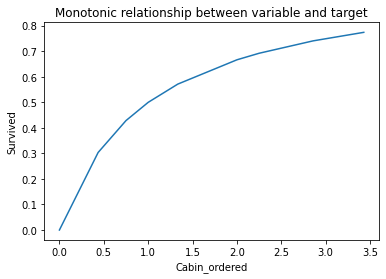

In [41]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')